In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import pathlib
import cv2
import tensorflow_hub as hub

In [2]:
data_dir=pathlib.Path('/kaggle/input/brain-tumors-256x256/Data')
data_dir

PosixPath('/kaggle/input/brain-tumors-256x256/Data')

In [3]:
label_mapping={
    'Glioma':list(data_dir.glob('glioma_tumor/*')),
    'Meningioma': list(data_dir.glob('meningioma_tumor/*')),
    'Normal':list(data_dir.glob('normal/*')),
    'Pituitary': list(data_dir.glob('pituitary_tumor/*'))
}

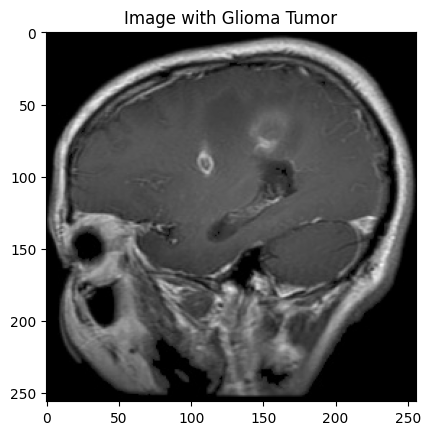

In [4]:
image1=cv2.imread(str(label_mapping['Glioma'][4]))
plt.title('Image with Glioma Tumor')
plt.imshow(image1)

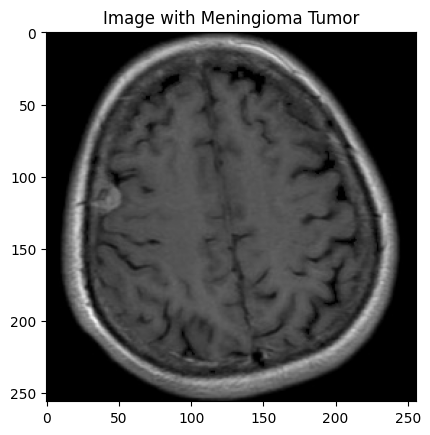

In [5]:
image2=cv2.imread(str(label_mapping['Meningioma'][0]))
plt.title('Image with Meningioma Tumor')
plt.imshow(image2)

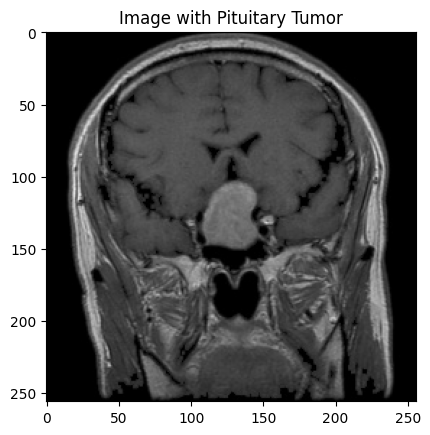

In [6]:
image3=cv2.imread(str(label_mapping['Pituitary'][0]))
plt.title('Image with Pituitary Tumor')
plt.imshow(image3)

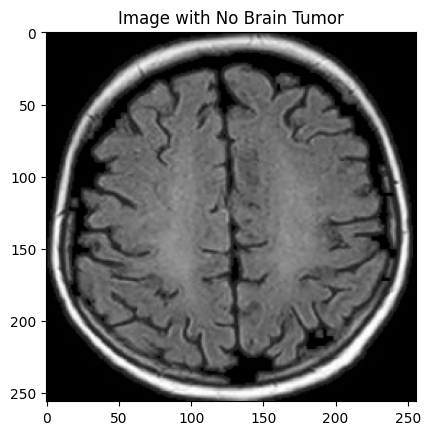

In [7]:
image4=cv2.imread(str(label_mapping['Normal'][10]))
plt.title('Image with No Brain Tumor')
plt.imshow(image4)

In [8]:
image4.shape

(256, 256, 3)

In [9]:
images=[]
labels=[]
for label in label_mapping:
    paths=label_mapping[label]
    for path in paths:
        image=cv2.imread(str(path))
        image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        image_resized=cv2.resize(image_rgb,(256,256))
        images.append(image_resized)
        labels.append(label)

In [10]:
len(images)

3096

In [11]:
X=np.array(images)
y=np.array(labels)

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [13]:
classes=le.inverse_transform([0,1,2,3])
classes

array(['Glioma', 'Meningioma', 'Normal', 'Pituitary'], dtype='<U10')

In [14]:
X=X.astype('float32')/255.0

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [16]:
x_train.shape

(2476, 256, 256, 3)

In [17]:
x_test.shape

(620, 256, 256, 3)

In [18]:
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Flatten
cnn=keras.Sequential([
    Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(256,256,3)),
    MaxPooling2D((2,2)),
    Conv2D(64,kernel_size=(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128,kernel_size=(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(4,activation='softmax')
])
cnn.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['Accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(monitor='val_Accuracy',patience=5,restore_best_weights=True)
cnn.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,callbacks=[early_stopping])

Epoch 1/50


I0000 00:00:1746262637.711463      71 service.cc:148] XLA service 0x7c56c000eb80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746262637.712309      71 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1746262637.712331      71 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1746262638.047140      71 cuda_dnn.cc:529] Loaded cuDNN version 90300


 3/78 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - Accuracy: 0.2934 - loss: 1.7010

I0000 00:00:1746262643.939522      71 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


78/78 ━━━━━━━━━━━━━━━━━━━━ 20s 151ms/step - Accuracy: 0.3399 - loss: 1.5065 - val_Accuracy: 0.5274 - val_loss: 1.1052
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - Accuracy: 0.6100 - loss: 0.9347 - val_Accuracy: 0.6387 - val_loss: 0.8278
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - Accuracy: 0.7508 - loss: 0.6218 - val_Accuracy: 0.7645 - val_loss: 0.6051
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - Accuracy: 0.8835 - loss: 0.3534 - val_Accuracy: 0.7677 - val_loss: 0.6393
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - Accuracy: 0.9189 - loss: 0.2283 - val_Accuracy: 0.8274 - val_loss: 0.5887
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - Accuracy: 0.9689 - loss: 0.0993 - val_Accuracy: 0.8548 - val_loss: 0.6044
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - Accuracy: 0.9777 - loss: 0.0689 - val_Accuracy: 0.8565 - val_loss: 0.6609
Epoch 8/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - Accuracy: 0.9929 - loss: 0.0226 - val_Accuracy: 0.8532 - val_loss: 

In [20]:
from sklearn.metrics import accuracy_score,classification_report
pred=cnn.predict(x_test)
pred=[np.argmax(i) for i in pred]
print(f'Accuracy : {accuracy_score(y_test,pred)}')
print(f'Classification Report :\n{classification_report(y_test,pred,target_names=classes)}')

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
Accuracy : 0.8725806451612903
Classification Report :
              precision    recall  f1-score   support

      Glioma       0.84      0.89      0.87       180
  Meningioma       0.88      0.78      0.82       183
      Normal       0.88      0.86      0.87        88
   Pituitary       0.90      0.96      0.93       169

    accuracy                           0.87       620
   macro avg       0.87      0.87      0.87       620
weighted avg       0.87      0.87      0.87       620



In [21]:
from tensorflow.keras import layers
data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal',input_shape=(256,256,3)),
    layers.RandomRotation(0.05),
    layers.RandomZoom(0.05),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Flatten
cnn_augmented=keras.Sequential([
    data_augmentation,
    Conv2D(32,kernel_size=(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64,kernel_size=(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128,kernel_size=(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(4,activation='softmax')
])
cnn_augmented.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['Accuracy'])

In [25]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(monitor='val_Accuracy',patience=10,restore_best_weights=True)
cnn_augmented.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,callbacks=[early_stopping])

Epoch 1/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - Accuracy: 0.9681 - loss: 0.0874 - val_Accuracy: 0.8839 - val_loss: 0.4324
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - Accuracy: 0.9728 - loss: 0.0762 - val_Accuracy: 0.8774 - val_loss: 0.4969
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - Accuracy: 0.9843 - loss: 0.0414 - val_Accuracy: 0.8855 - val_loss: 0.3967
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - Accuracy: 0.9815 - loss: 0.0598 - val_Accuracy: 0.8710 - val_loss: 0.5298
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - Accuracy: 0.9840 - loss: 0.0436 - val_Accuracy: 0.8661 - val_loss: 0.6458
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - Accuracy: 0.9817 - loss: 0.0452 - val_Accuracy: 0.9016 - val_loss: 0.4062
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - Accuracy: 0.9798 - loss: 0.0529 - val_Accuracy: 0.8774 - val_loss: 0.4656
Epoch 8/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - Accuracy: 0.9854 - loss: 0.0439 - val_Accuracy: 0.8871 - 

In [26]:
from sklearn.metrics import accuracy_score,classification_report
pred=cnn_augmented.predict(x_test)
pred=[np.argmax(i) for i in pred]
print(f'Accuracy : {accuracy_score(y_test,pred)*100:.4f}%')
print(f'Classification Report :\n{classification_report(y_test,pred,target_names=classes)}')

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
Accuracy : 90.1613%
Classification Report :
              precision    recall  f1-score   support

      Glioma       0.91      0.86      0.89       180
  Meningioma       0.84      0.89      0.86       183
      Normal       0.93      0.92      0.93        88
   Pituitary       0.95      0.95      0.95       169

    accuracy                           0.90       620
   macro avg       0.91      0.90      0.91       620
weighted avg       0.90      0.90      0.90       620



In [35]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers, models

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.Resizing(224, 224, input_shape=(256, 256, 3)),
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),
    layers.RandomZoom(0.05),
], name="data_augmentation")


mobile_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4"
mobilenet_layer = hub.KerasLayer(
    mobile_url,
    input_shape=(224, 224, 3),
    trainable=True
)

# Functional Model
inputs = tf.keras.Input(shape=(256, 256, 3))
x=data_augmentation(inputs)
x = tf.keras.layers.Lambda(lambda x: mobilenet_layer(x), output_shape=(1280,))(x)
print("Shape of output from MobileNetV2:", x.shape)
x=layers.Flatten()(x)
x = layers.Dense(256, activation='relu',input_shape=(1280,))(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(128, activation='relu',input_shape=(1280,))(x)
x = layers.Dense(64, activation='relu',input_shape=(1280,))(x)
outputs = layers.Dense(4, activation='softmax')(x)

cnn_mobilenet = tf.keras.Model(inputs, outputs)

cnn_mobilenet.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn_mobilenet.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Shape of output from MobileNetV2: (None, 1280)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "functional_99"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ data_augmentation (Sequential)       │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_1 (Lambda)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 369,348 (1.41 MB)

 Trainable params: 369,348 (1.41 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(monitor='val_accuracy',patience=10,mode='max',restore_best_weights=True)
cnn_mobilenet.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,callbacks=[early_stopping])

Epoch 1/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.8706 - loss: 0.3489 - val_accuracy: 0.8323 - val_loss: 0.4810
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.8555 - loss: 0.3653 - val_accuracy: 0.8161 - val_loss: 0.5024
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.8331 - loss: 0.4253 - val_accuracy: 0.8323 - val_loss: 0.5390
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.8708 - loss: 0.3599 - val_accuracy: 0.8387 - val_loss: 0.4533
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.8553 - loss: 0.3851 - val_accuracy: 0.7758 - val_loss: 0.6077
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.8726 - loss: 0.3553 - val_accuracy: 0.8258 - val_loss: 0.4404
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.8601 - loss: 0.3726 - val_accuracy: 0.8113 - val_loss: 0.4772
Epoch 8/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.8631 - loss: 0.3553 - val_accuracy: 0.8032 - v

In [34]:
from sklearn.metrics import accuracy_score,classification_report
pred=cnn_mobilenet.predict(x_test)
pred=[np.argmax(i) for i in pred]
print(f'Accuracy : {accuracy_score(y_test,pred)*100:.4f}%')
print(f'Classification Report :\n{classification_report(y_test,pred,target_names=classes)}')

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
Accuracy : 87.0968%
Classification Report :
              precision    recall  f1-score   support

      Glioma       0.95      0.78      0.85       180
  Meningioma       0.79      0.83      0.81       183
      Normal       0.93      0.93      0.93        88
   Pituitary       0.87      0.98      0.92       169

    accuracy                           0.87       620
   macro avg       0.88      0.88      0.88       620
weighted avg       0.88      0.87      0.87       620



In [63]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers, models

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.Resizing(224, 224, input_shape=(256, 256, 3)),
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),
    layers.RandomZoom(0.05),
], name="data_augmentation")

# Load ResNet50 V2 from TF Hub
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"
resnet_layer = hub.KerasLayer(
    resnet_url,
    input_shape=(224, 224, 3),
    trainable=True
)

# Functional Model
inputs = tf.keras.Input(shape=(256, 256, 3))
x = data_augmentation(inputs)
x = tf.keras.layers.Lambda(lambda x: resnet_layer(x), output_shape=(2048,))(x)
print("Shape of output from ResNet50:", x.shape)

# Flatten the output from ResNetV2
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu', input_shape=(2048,))(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(128, activation='relu', input_shape=(2048,))(x)
x = layers.Dense(64, activation='relu', input_shape=(2048,))(x)
outputs = layers.Dense(4, activation='softmax')(x)

# Create the Model
cnn_resnet = tf.keras.Model(inputs, outputs)

# Compile the Model
cnn_resnet.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Display the model summary
cnn_resnet.summary()


Shape of output from ResNet50: (None, 2048)


Model: "functional_123"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_32 (InputLayer)          │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ data_augmentation (Sequential)       │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_11 (Lambda)                   │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 565,956 (2.16 MB)

 Trainable params: 565,956 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(monitor='val_accuracy',patience=10,mode='max',restore_best_weights=True)
cnn_resnet.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,callbacks=[early_stopping])

In [130]:
from sklearn.metrics import accuracy_score,classification_report
pred=cnn_resnet.predict(x_test)
pred=[np.argmax(i) for i in pred]
print(f'Accuracy : {accuracy_score(y_test,pred)*100:.4f}%')
print(f'Classification Report :\n{classification_report(y_test,pred,target_names=classes)}')

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step
Accuracy : 84.0323%
Classification Report :
              precision    recall  f1-score   support

      Glioma       0.96      0.73      0.83       180
  Meningioma       0.75      0.85      0.80       183
      Normal       0.94      0.83      0.88        88
   Pituitary       0.82      0.95      0.88       169

    accuracy                           0.84       620
   macro avg       0.87      0.84      0.85       620
weighted avg       0.86      0.84      0.84       620

